# Malaysia Air Pollution Analysis <a href="https://www.utm.my" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Any chemical, physical, or biological agent that alters the atmospheric characteristics, whether indoors or outdoors, is considered air pollution. Common sources of air pollution include automobiles, factories, residential structures, and wildfires. Particulate matter, carbon monoxide, ozone, nitrogen dioxide, and sulfur dioxide are all pollutants that pose a substantial risk to public health. Both outdoor and indoor air pollution is a major contributor to respiratory and other diseases and a leading cause of death.

This project is about Malaysia Air Pollution exploratory data analysis. This dataset contains geolocated data regarding the following pollutants: Nitrogen Dioxide, Ozone, Carbon Monoxide, and Particulate Matter. It enables us to analyze the air pollution levels in Malaysia based on the AQI value and category. The dataset consists of AQI values of different pollutants for many cities all over the world.


The dataset is found from kaggle datasets [Global Air Pollution Dataset](https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset)

###The tools and techniques used in this dataset are:

*   Pandas
*   Numpy
*   Scipy
*   Scikit-learn 
*   Matplotlib.pyplot 
*   Seaborn

**Group Lab Members:**

1.   NURARISSA DAYANA BINTI MOHD SUKRI A20EC0120
2.   SAKINAH AL'IZZAH BINTI MOHD ASRI A20EC0142

## Downloading the Dataset

**TODO:**


1. Go to your account, Scroll to API section and Click on Create New API Token - It will download kaggle.json file on your machine.
2. Run the following commands.
3. Choose the kaggle.json file that you downloaded.
4. Make directory named kaggle and copy kaggle.json file there.
5. Change the permissions of the file.
6. Download the dataset using the Kaggle API command and list the files in the dataset.
7. Extract the dataset and unzip the file to read as .csv*



In [2]:
!pip install squarify
!pip install statsmodels
!pip install seaborn
!pip install xgboost
! pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurarissadayana","key":"6789a872cedf6247af328d6e226fdac1"}'}

In [4]:
# Make directory named kaggle and copy kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d hasibalmuzdadid/global-air-pollution-dataset #link to download dataset

100% 371k/371k [00:00<00:00, 1.08MB/s]
100% 371k/371k [00:00<00:00, 1.08MB/s]


The dataset has been downloaded and extracted.

In [6]:
!unzip global-air-pollution-dataset.zip

Archive:  global-air-pollution-dataset.zip
  inflating: global air pollution dataset.csv  


## Data Preparation and Cleaning
**TODO:** 


1.   Importing libraries that will be used
2.   Read the population_data_2010-2019.csv file
3.   Print the summary of the dataset
4.   Describe the dataset
5.   Identify any missing value in the dataset and remove null rows (if any)

1) Importing libraries

In [7]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

2) Read the global air pollution dataset and print the first 5 rows

In [8]:
df = pd.read_csv('global air pollution dataset.csv')
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


3) Print the summary of the dataset

This dataset has 12 columns and 23463 rows. We will see the summary of this data:

In [9]:
df.shape

(23463, 12)

In [10]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


4) Describe the dataset

Before we proceed, the next step is to analyse the data type. Information about each column and null values for each column are shown.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


Most of the data types are object except AQI value, CO AQI value, Ozone AQI value, NO2 AQI value and PM2.5 AQI value. Since we are only interested in data regarding air pollution in Malaysia, we will limit our analysis to this country.

In [12]:
mas = df.loc[(df ['Country'] == 'Malaysia')]
mas.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
271,Malaysia,Ayer Keroh,59,Moderate,1,Good,34,Good,0,Good,59,Moderate
280,Malaysia,Bandar Penggaram,76,Moderate,1,Good,39,Good,0,Good,76,Moderate
287,Malaysia,Batu Gajah,92,Moderate,2,Good,57,Moderate,1,Good,92,Moderate
576,Malaysia,Limbang,95,Moderate,9,Good,95,Moderate,0,Good,46,Good
741,Malaysia,Masjid Tanah,79,Moderate,2,Good,36,Good,0,Good,79,Moderate


5) Identify any missing values

In [13]:
total_null = mas.isnull().sum()[mas.isnull().sum() == 0].sort_values(ascending = False)
percent = pd.Series(round(total_null/len(mas)*100,2))
pd.concat([total_null, percent], axis=1, keys=['Total Null', 'Percentage'])

,Total Null,Percentage
Country,0,0.0
City,0,0.0
AQI Value,0,0.0
AQI Category,0,0.0
CO AQI Value,0,0.0
CO AQI Category,0,0.0
Ozone AQI Value,0,0.0
Ozone AQI Category,0,0.0
NO2 AQI Value,0,0.0
NO2 AQI Category,0,0.0


There is no missing value in the dataset. Next, the columns are checked for whitespaces and duplicates.

In [14]:
mas.duplicated().sum()

0

In [15]:
cols = ['Country','City','AQI Category','CO AQI Category','Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category']
mas[cols] = mas[cols].apply(lambda x: x.str.strip())
mas.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
271,Malaysia,Ayer Keroh,59,Moderate,1,Good,34,Good,0,Good,59,Moderate
280,Malaysia,Bandar Penggaram,76,Moderate,1,Good,39,Good,0,Good,76,Moderate
287,Malaysia,Batu Gajah,92,Moderate,2,Good,57,Moderate,1,Good,92,Moderate
576,Malaysia,Limbang,95,Moderate,9,Good,95,Moderate,0,Good,46,Good
741,Malaysia,Masjid Tanah,79,Moderate,2,Good,36,Good,0,Good,79,Moderate


The number of unique Malaysia cities.

In [16]:
mas['City'].nunique()

125

The data shows that the most data recorded for each city is one. Below is the list of all the cities included.

In [17]:
mas['City'].value_counts()

Ayer Keroh          1
Sabak               1
Kota Bahru          1
Alor Setar          1
Semenyih            1
                   ..
Jitra               1
Kuala Terengganu    1
Nilai               1
Ayer Tawar          1
Marang              1
Name: City, Length: 125, dtype: int64

In [18]:
sorted(mas["City"].unique())

['Alor Gajah',
 'Alor Setar',
 'Ayer Itam',
 'Ayer Keroh',
 'Ayer Molek',
 'Ayer Tawar',
 'Bandar Maharani',
 'Bandar Penggaram',
 'Banting',
 'Batang Berjuntai',
 'Batu Arang',
 'Batu Berendam',
 'Batu Gajah',
 'Beaufort',
 'Bedong',
 'Bemban',
 'Bentong',
 'Beranang',
 'Bidor',
 'Bintulu',
 'Bukit Bakri',
 'Bukit Baru',
 'Bukit Mertajam',
 'Bukit Rambai',
 'Buloh Kasap',
 'Chaah',
 'Cukai',
 'Gua Musang',
 'Gurun',
 'Ipoh',
 'Jenjarom',
 'Jerantut',
 'Jertih',
 'Jitra',
 'Johor Bahru',
 'Juru',
 'Kampar',
 'Kangar',
 'Kapit',
 'Kelapa Sawit',
 'Keningau',
 'Kepala Batas',
 'Kerteh',
 'Kinarut',
 'Klang',
 'Kluang',
 'Kota Bahru',
 'Kota Belud',
 'Kota Tinggi',
 'Kuah',
 'Kuala Kangsar',
 'Kuala Krai',
 'Kuala Lipis',
 'Kuala Lumpur',
 'Kuala Perlis',
 'Kuala Pilah',
 'Kuala Selangor',
 'Kuala Sungai Baru',
 'Kuala Terengganu',
 'Kuang',
 'Kuantan',
 'Kuching',
 'Kudat',
 'Kulai',
 'Kulim',
 'Labis',
 'Lahad Datu',
 'Lawan Kuda Baharu',
 'Limbang',
 'Lumut',
 'Marang',
 'Masjid Tanah'

## Exploratory Analysis and Visualization

**Tables- AQI and Major Pollutants Highest Distribution by City**

**Graph 1- Histogram of AQI Value in Malaysia**

**Graph 2- Scatter Plot with Regression Line of AQI Value against the Major Pollutants**

**Graph 3- Bar chart AQI Value vs Country**

**Graph 4- Pointplot of AQI across Malaysia (City-wise)** 

**Graph 5- Heatmap for correlated Malaysia data**



**Tables**- *AQI and Major Pollutants Highest Distribution by City*

The tables depicts the city-by-city distribution of the most prevalent pollutants: CO, Ozone, NO2, PM2.5, and the Air Quality Index (AQI)

Frequently, cities like Miri, Rawang, and Pangkalan Kundang that have a high AQI Value also rank highly in other tables for major pollutants.

In [19]:
#mean value
mas.groupby('City')[['AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']].mean().sort_values(by='AQI Value', ascending=False).head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
City,,,,,
Miri,209.0,67.0,209.0,2.0,157.0
Rawang,163.0,6.0,8.0,25.0,163.0
Pengkalan Kundang,162.0,5.0,12.0,23.0,162.0
Serendah,162.0,6.0,9.0,23.0,162.0
Sekudai,161.0,3.0,4.0,24.0,161.0


In [20]:
#mean of CO AQI Value
mas.groupby('City')[['CO AQI Value']].mean().sort_values(by='CO AQI Value',ascending=False).head()

,CO AQI Value
City,
Miri,67.0
Limbang,9.0
Papar,7.0
Serendah,6.0
Beaufort,6.0


In [21]:
#mean of Ozone AQI Value
mas.groupby('City')[['Ozone AQI Value']].mean().sort_values(by='Ozone AQI Value',ascending=False).head()

,Ozone AQI Value
City,
Miri,209.0
Limbang,95.0
Kuala Kangsar,74.0
Ayer Tawar,66.0
Kuala Perlis,61.0


In [22]:
#mean of NO2 AQI Value
mas.groupby('City')[['NO2 AQI Value']].mean().sort_values(by='NO2 AQI Value',ascending=False).head()

,NO2 AQI Value
City,
Rawang,25.0
Sekudai,24.0
Pengkalan Kundang,23.0
Serendah,23.0
Pasir Gudang,21.0


In [25]:
#mean of PM2.5 AQI Value
mas.groupby('City')[['PM2.5 AQI Value']].mean().sort_values(by='PM2.5 AQI Value',ascending=False).head()

,PM2.5 AQI Value
City,
Rawang,163.0
Serendah,162.0
Pengkalan Kundang,162.0
Sekudai,161.0
Miri,157.0


**1** - Histogram of AQI Value in Malaysia

The graph shows distribution of AQI Value in Malaysia. It provides a visual interpretation of numerical data by showing the number of AQI Values that fall within a specified range of categories.

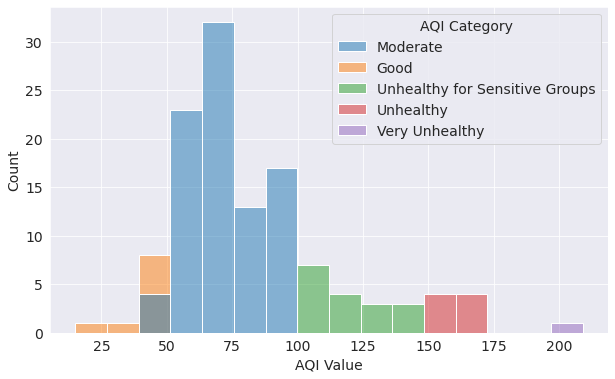

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(data=mas, x='AQI Value', hue='AQI Category')

**2** - Scatter Plot with Regression Line of AQI Value against the Major Pollutants

The slope of the regression line provides an illustration of the strength of the relationship that exists between each pollutant and the AQI Value. The positive correlation between the major pollutants is displayed in the graph that can be found below.

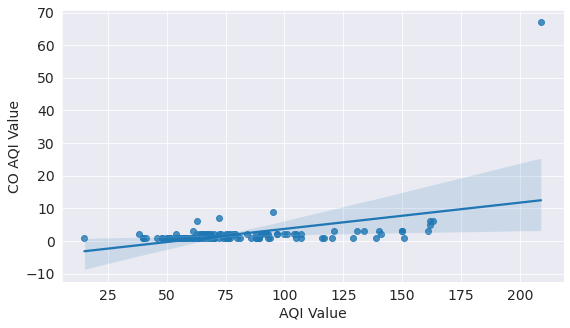

In [27]:
sns.regplot(x="AQI Value", y="CO AQI Value", data=mas)

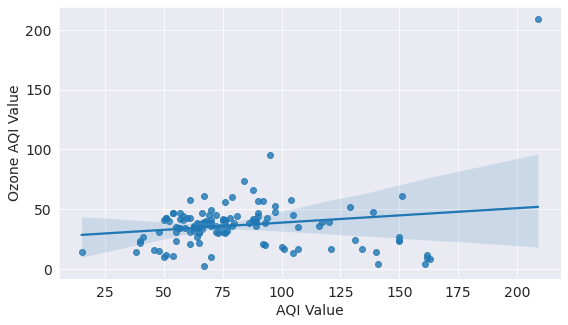

In [28]:
sns.regplot(x="AQI Value", y="Ozone AQI Value", data=mas)

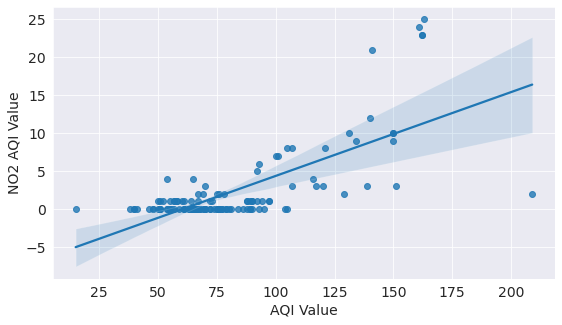

In [29]:
sns.regplot(x="AQI Value", y="NO2 AQI Value", data=mas)

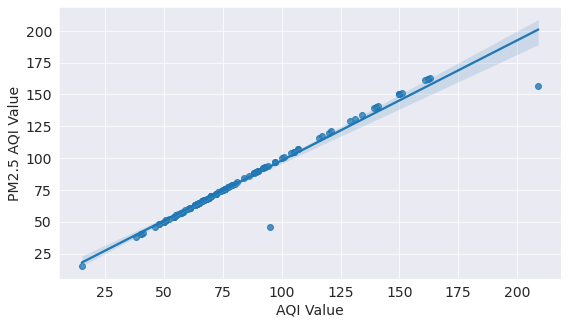

In [30]:
sns.regplot(x="AQI Value", y="PM2.5 AQI Value", data=mas)

**3** - Bar chart AQI Value vs City in Malaysia

Text(0.5, 1.0, 'City in Malaysia with Worst Overall AQI value')

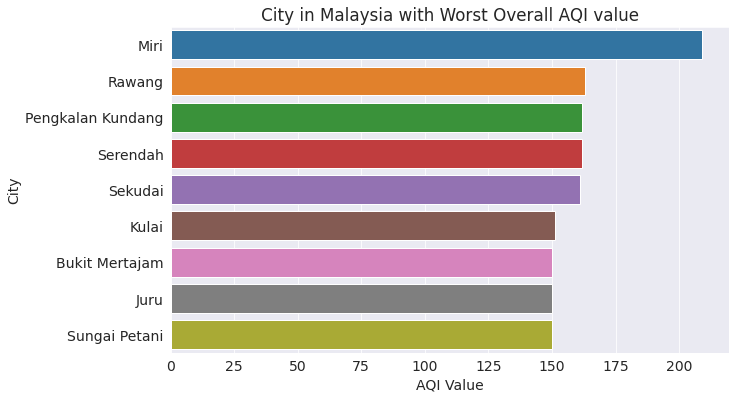

In [59]:
aql_overall = mas[['City','AQI Value','AQI Category']]
cat = (aql_overall['AQI Category'] == 'Unhealthy' ) | (aql_overall['AQI Category'] == 'Very Unhealthy')
aql_overall_haz = aql_overall[cat]
worst = aql_overall_haz.groupby('City',as_index=False)['AQI Value'].mean().sort_values(by='AQI Value',ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='AQI Value', y='City',data=worst)
plt.title('City in Malaysia with Worst Overall AQI value')

Text(0.5, 1.0, 'City in Malaysia with Good Overall AQI value')

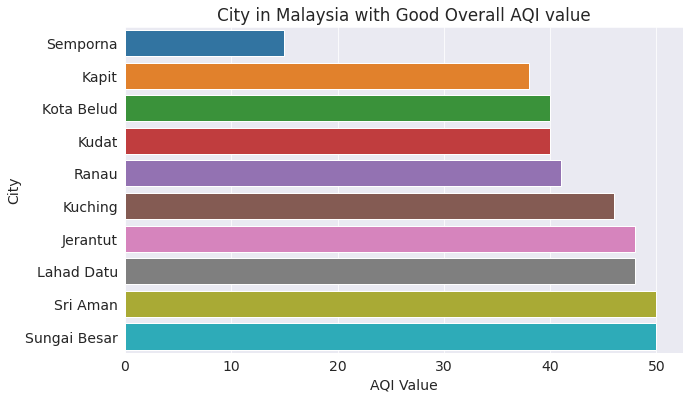

In [60]:
aql_overall_good = mas[mas['AQI Category'] == 'Good']
good = aql_overall_good.groupby('City',as_index=False)['AQI Value'].mean().sort_values(by='AQI Value').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='AQI Value', y='City',data=good)
plt.title('City in Malaysia with Good Overall AQI value')

**4** - Pointplot of AQI across Malaysia (City-wise)

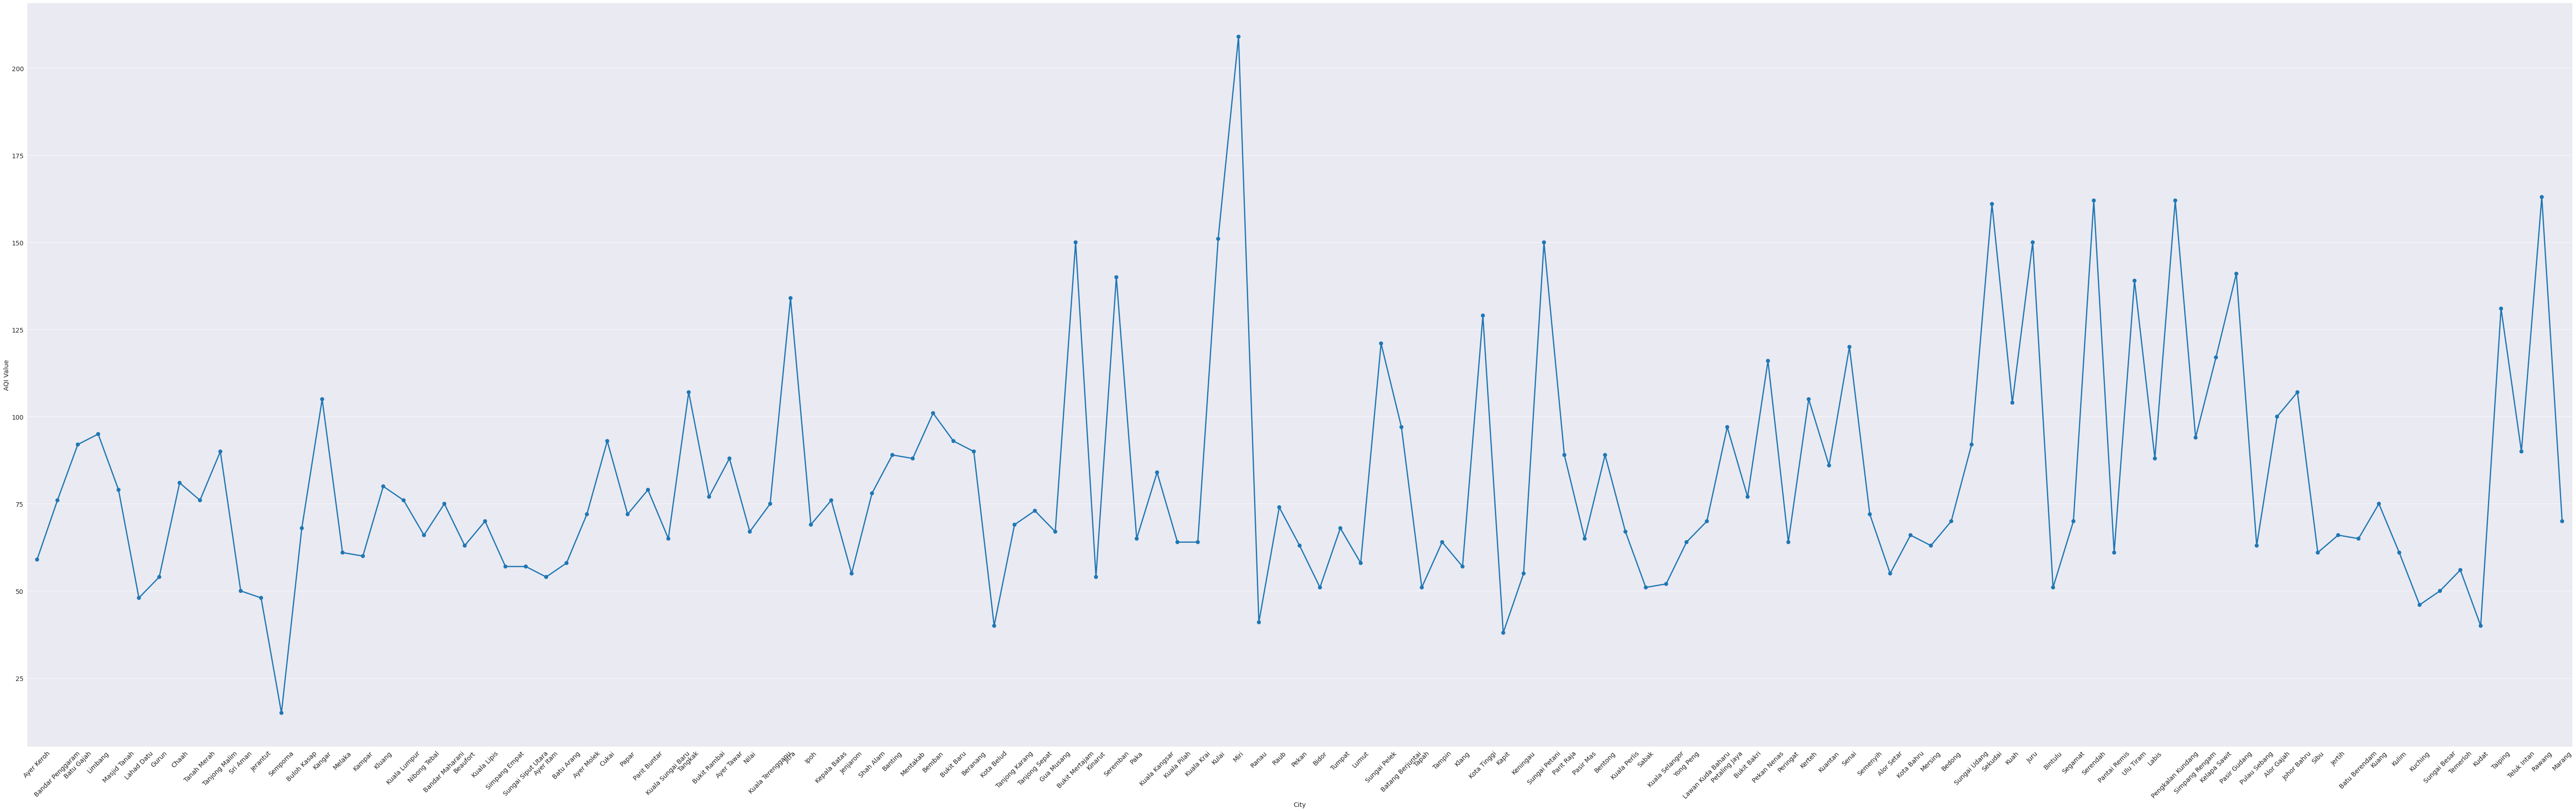

In [61]:
#Visualization of AQI across Malaysia 

aqi_city = mas[['AQI Value','City']].groupby(["City"]).median().reset_index().sort_values(by='City',ascending=False)
f,ax=plt.subplots(figsize=(100,30))
ax=sns.pointplot(x='City', y='AQI Value', data=mas)
ax.set_xticklabels(mas["City"], rotation=45)
plt.show()

**5** - Heatmap for correlated Malaysia data

*Correlation can refer to any statistical association, but it most commonly refers to how close two variables are to having a linear relationship with each other. On a scatterplot, the correlation coefficient r measures the strength and direction of a linear relationship between two variables. If r>0, the correlation is stronger, and if r0, the correlation is inversely related.*

Text(0.5, 1.0, 'Heatmap showing correlated values for the Dataset')

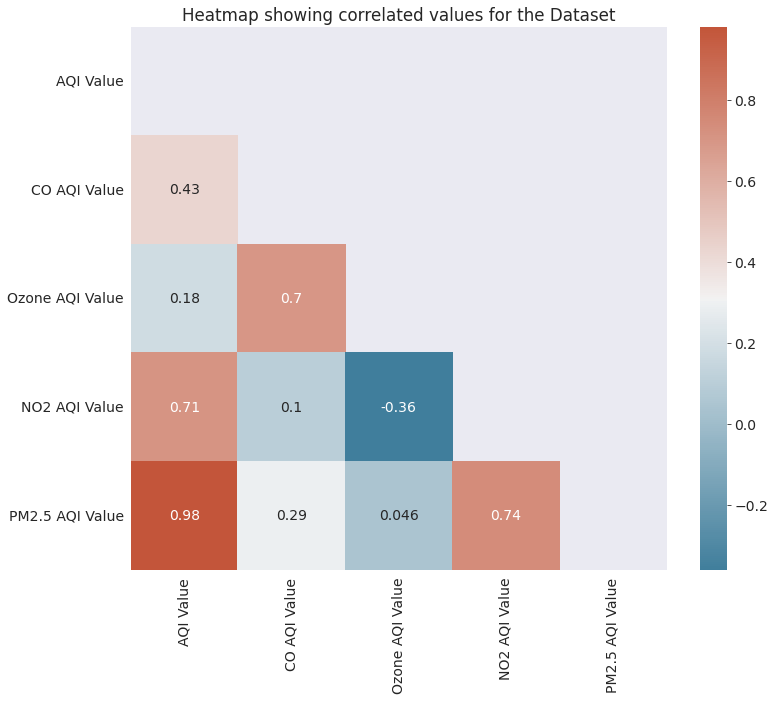

In [62]:
#correlation
corr = mas.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
ax.set_title('Heatmap showing correlated values for the Dataset')

## Asking and Answering Questions
**Q1: What is the condition of Malaysia Air Quality Index?**

**Q2: Are the relationship between AQI Value and the pollutants significant?**

**Q3: What are the top five cities with the best and worst overall AQI value?**

**Q4: Which of the Malaysia cities has the highest and lowest AQI value?**

**Q5: Is there a significant positive correlation between Malaysian pollutant category AQI values?**

#### **Q1**: What is the condition of Malaysia Air Quality Index?
**Answer:**

The histogram shows a positive skewed distribution. It can be seen that:
- 1 to 50 of AQI Value is under Good category
- 50 to 100 of AQI Value is under Moderate category 
- 100 to 150 of AQI Value is under Unhealthy for Sensitive Group category 
- 150 to 175 of AQI Value is under Unhealthy category 
- 175 and above of AQI Value is under Very Unhealthy category

Based on that, it can be conclude that majority of the cities in Malaysia has a moderate air quality.

>Refer to [AQI Value in Malaysia Histogram](#scrollTo=c7fugjWzVJJ7&line=1&uniqifier=1) (Click link to scroll)

>The library function description:
*   Seaborn:Histogram Graph
*   Pandas: determine axis,indicator 

#### **Q2**: Are the relationship between AQI Value and the pollutants significant?

**Answer:**

There is a significant correlation between rising levels of NO2 and PM2.5 and increasing AQI values. While CO and Ozone also shows a positive correlation, NO2 and PM2.5 are much higher. 

>Refer to [NO2 AQI Value vs AQI Value Scatter Plot](#scrollTo=7PM7UQaA4ylA&line=1&uniqifier=1) (Click link to scroll)

>Refer to [PM2.5 AQI Value vs AQI Value Scatter Plot](#scrollTo=2We88aUq42MW&line=1&uniqifier=1) (Click link to scroll)

>The library function description:
*   Seaborn:Scatter Plot Graph
*   Pandas: determine axis 

#### **Q3:** What are the top five cities with the best/worst overall AQI value?

#### **Answer:**
Top 5 cities with the best overall AQI value are:

1.   Semporna
2.   Kapit
3.   Kota Belud
4.   Kudat
5.   Ranau

Top 5 cities with the worst overall AQI value are:

1.   Miri
2.   Rawang
3.   Pengkalan Kundang
4.   Serendah
5.   Sekudai

>Refer to [Barchart city in Malaysia with worst overall AQI value](#scrollTo=kMrm6CiAVJJ8&line=1&uniqifier=1) (Click link to scroll)

>Refer to [Barchart city in Malaysia with good overall AQI value](#scrollTo=RSt7KlcfVJJ8&line=1&uniqifier=1) (Click link to scroll)

>The library function description:
*   Seaborn:Bar graph
*   Pandas: Group By Cities in Malaysia and AQI value


#### **Q4:** Which of the Malaysia cities has the highest and lowest AQI value?
####**Answer:** Miri has the highest AQI value in Malaysia that indicate very unhealthy air environment , and Semporna has the lowest AQI value in Malaysia that shows good air environment.

> Refer to [Pointplot of AQI across Malaysia](#scrollTo=61sgf555VJJ8&line=2&uniqifier=1) (Click link to scroll)

>The library function description:
*   Seaborn:Pointplot graph
*   Pandas: Group By City and AQI value

In [ ]:
highest_aqi = mas.loc[(mas ['City'] == 'Miri')]
highest_aqi

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
12800,Malaysia,Miri,209,Very Unhealthy,67,Moderate,209,Very Unhealthy,2,Good,157,Unhealthy


In [ ]:
lowest_aqi = mas.loc[(mas ['City'] == 'Semporna')]
lowest_aqi

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
2606,Malaysia,Semporna,15,Good,1,Good,14,Good,0,Good,15,Good


####**Q5:** Is there a significant positive correlation between Malaysian pollutant category AQI values?

####**Answer:** Variables such as *NO2 AQI Value & AQI Value*, *PM2.5 AQI Value & AQI Value* and *Ozone AQI Value & CO AQI Value* are having strong positive correlation. This means that when one variable increases, the other variable also increases such as if Malaysia's AQI value of Ozone increase then the AQI value of Carbon Monoxide also increase. Generally speaking, a Pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity.

> Refer to [Heatmap for correlated Malaysia data](#scrollTo=Zatc4Si_VJJ8&line=1&uniqifier=1) (Click link to scroll)

>The library function description:
*   Seaborn: Correlation Heatmap graph
*   Pandas: Determine correlation, generate a mask, and custom colormap

## Inferences and Conclusion

**Inferences** - According to the table calculations, Miri has the highest mean AQI Value, CO AQI, and Ozone AQI Value. Rawang has the highest levels of NO2 and PM2.5 AQI Value. The scatter plot demonstrates that PM2.5 and NO2 have a stronger positive correlation than CO and Ozone. This may explain why Rawang has a high AQI value despite the fact that only PM2.5 has a very high value in that city. This is because PM2.5 had a significant impact on the AQI Value. According to the bar chart and point plot, Miri is the city with the lowest AQI Value, while Semporna has the highest. According to the heatmaps, there is a strong correlation between all of the major pollutants. The histogram shows that the Air Quality Index (AQI) in Malaysian cities is below the threshold for hazardous. Moderate air quality is the most common occurrence.

**Conclusion** - From the above analysis,  the air quality across the vast majority of Malaysia is moderate, or within acceptable limits. However, there may be a risk for some people, particularly those with extreme sensitivities to air pollution. Furthermore, no Malaysian citizen is at high risk because air quality in Malaysian cities does not reach hazardous levels, so no one needs to stay indoors and wear a mask to protect themselves from the pollution. 

Looking at the plots for all of the cities above, it is clear that the AQI values in Malaysia are under control, but several cities require immediate action. As a result, there is no such thing as a safe level of air pollution, especially as the AQI approaches 50 and beyond. By learning whether or not the air we breathe is safe and how air pollution can affect our health, we can reduce the negative effects of air pollution on our bodies. 




## References and Future Work

**References** - https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset